In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [19]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.drop(['Surname', 'CustomerId'], axis=1, inplace=True)
df_test.drop(['Surname', 'CustomerId'], axis=1, inplace=True)

In [20]:
# df_train.drop(['CreditScore', 'Balance'], axis=1, inplace=True)
# df_test.drop(['CreditScore', 'Balance'], axis=1, inplace=True)

In [21]:
label_encoder = LabelEncoder()

In [22]:
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

df_train['Geography'] = label_encoder.fit_transform(df_train['Geography'])
df_test['Geography'] = label_encoder.fit_transform(df_test['Geography'])

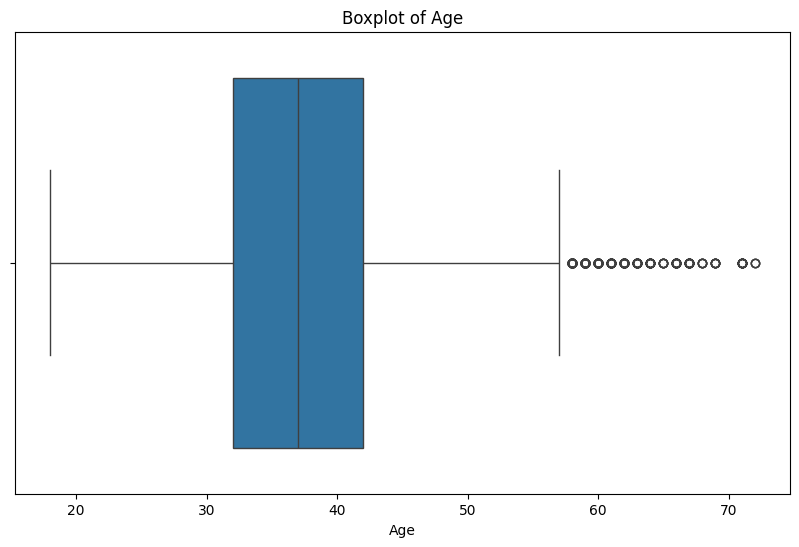

Number of outliers: 383
          id  CreditScore  Geography  Gender   Age  Tenure    Balance  \
36        36        673.0          0       0  66.0     6.0       0.00   
53        53        695.0          0       1  67.0     9.0  123863.64   
59        59        599.0          0       1  61.0     6.0  123971.31   
61        61        581.0          2       1  66.0     4.0       0.00   
119      119        581.0          1       0  62.0     9.0  129895.19   
...      ...          ...        ...     ...   ...     ...        ...   
14840  14840        645.0          2       1  59.0    10.0       0.00   
14867  14867        554.0          1       1  60.0     3.0  117505.07   
14961  14961        535.0          1       0  59.0     9.0  132077.48   
14969  14969        682.0          0       1  63.0     2.0       0.00   
14971  14971        573.0          1       0  60.0     6.0  123895.83   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
36               2.0    

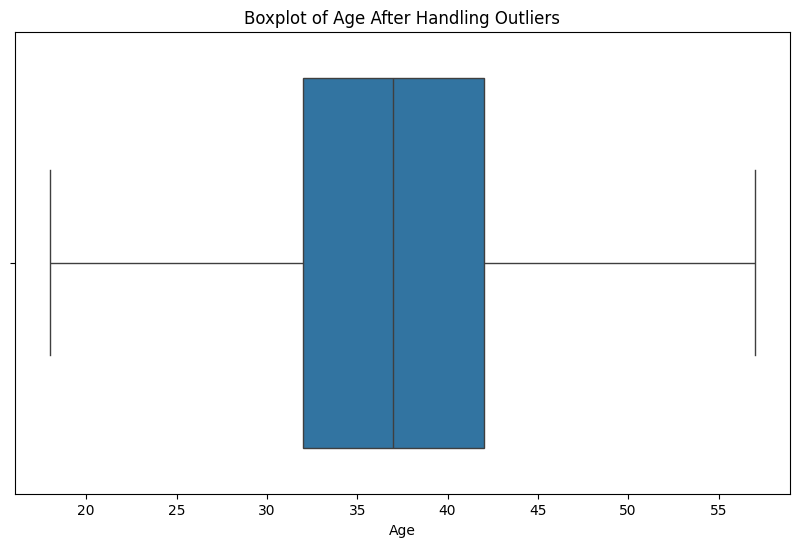

In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Age'])
plt.title('Boxplot of Age')
plt.show()

# Identifying outliers using the IQR method
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
print(outliers)

# Handling outliers: Option 1 - Remove outliers
df_train_no_outliers = df_train[~((df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound))]

# Handling outliers: Option 2 - Cap outliers
df_train['Age'] = np.where(df_train['Age'] > upper_bound, upper_bound, df_train['Age'])
df_train['Age'] = np.where(df_train['Age'] < lower_bound, lower_bound, df_train['Age'])

# Display the changes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Age'])
plt.title('Boxplot of Age After Handling Outliers')
plt.show()

In [24]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_train.drop('Exited', axis=1))
scaled_test = scaler.transform(df_test)

In [25]:
X = scaled_train
y = df_train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
a = pd.DataFrame({
    'id':df_test['id']
})
df_train.drop(['id','Gender'],axis=1,inplace=True)
df_test.drop(['id','Gender'],axis=1,inplace=True)

In [27]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = model.predict(scaled_test)

# Prepare the submission file
submission = pd.DataFrame({
    'id': a['id'],  # Assuming CustomerId is required in the submission
    'Exited': y_test_pred
})

submission.to_csv('submission333333.csv', index=False)
print("Submission file created: submission333333.csv")

Validation Accuracy: 0.8866666666666667
Submission file created: submission333333.csv
